In [1]:
!pip install torch torchvision torchaudio --index-url https://download.pytorch.org/whl/cu118 --user
!pip install matplotlib

Looking in indexes: https://download.pytorch.org/whl/cu118


In [2]:
# Import the needed libraries
import os
import pandas as pd
import numpy as np
from torchvision.io import read_image
import torchvision.transforms as T
import torch
from torch.utils.data import Dataset, DataLoader
import torchvision.transforms as T
from PIL import Image, ImageDraw
import matplotlib
import matplotlib.pyplot as plt

In [3]:

if torch.cuda.is_available():
    device = torch.device("cuda")
else:
    device = torch.device("cpu")

In [4]:
class TowerDataset(Dataset):
    def __init__(self, annotations_file, img_dir, transform=None, target_transform=None):
        self.img_labels = pd.read_csv(annotations_file)
        self.img_list = pd.read_csv(img_dir + 'images.csv')
        self.img_dir = img_dir
        self.transform = transform
        self.target_transform = target_transform

    def __len__(self):
        return len(self.img_labels)

    def __getitem__(self, idx):
        img_path =  self.img_list.loc[self.img_list['Filename'] == self.img_labels.iloc[idx, 11], 'Path'].iloc[0]
        #img_path = img_path_s.iloc[0]
        image = read_image(img_path)
        label = self.img_labels.iloc[idx, 9]
        bbox = (self.img_labels.iloc[idx, 15], 
                self.img_labels.iloc[idx, 16],
                self.img_labels.iloc[idx, 17], 
                self.img_labels.iloc[idx, 18])
        if self.transform:
            image = self.transform(image)
        if self.target_transform:
            label = self.target_transform(label)
        return image, label, bbox

In [5]:
#Initialize the dataset
TowerDataset = TowerDataset('data/finaltotal.csv','data/')

In [6]:
#Print out the label dataset
TowerDataset.img_labels

,pylone,degat,degat_IA,face,partie,partie_du_pylone,catalogue,localisation,symbol,nature,gravite_ou_mesure,image,posx,posy,altitude,topleftx,toplefty,bottomrightx,bottomrighty
0,P10,1,1,D,fût,fût,6. TREILLIS/ VAKWERKSTAAF,06. treillis/vakwerkstaaf,circle,peinture,1,P10STR_079.13_082.46_-003.2_000.13_H1_DOWN_001...,192.641129,268.062262,79.13,3053,442,2970,364
1,P10,2,3,H2,fût,fût,1.1 MEMBRURE/HOOFDSTIJL,02. joint/verbinding,cross,rouille,2,P10STR_080.19_080.5_-002.14_-001.82_H1_DOWN_00...,22.298387,261.710076,80.19,1184,1547,1085,1434
2,P10,3,4,D,fût,fût,6. TREILLIS/ VAKWERKSTAAF,06. treillis/vakwerkstaaf,defo,deformation,6,P10STR_080.68_080.5_-001.65_-001.83_H1_UP_001_...,194.193548,261.145437,80.68,2134,1362,4907,2310
3,P10,3,106,D,fût,fût,6. TREILLIS/ VAKWERKSTAAF,06. treillis/vakwerkstaaf,defo,deformation,6,P10STR_080.25_080.71_-002.04_-001.58_H4_DOWN_0...,194.193548,261.145437,80.25,470,374,3588,1313
4,P10,4,6,D,fût,fût,6. TREILLIS/ VAKWERKSTAAF,06. treillis/vakwerkstaaf,circle,rouille,2,P10STR_081.2_084.58_-001.13_002.25_H1_DOWN_005...,198.991935,261.427757,81.20,3920,1412,3512,1315
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
423,P14,48,85,B,tête,chevalet,6. TREILLIS/ VAKWERKSTAAF,06. treillis/vakwerkstaaf,circle,peinture,1,P14_H4-UP_DJI_0560.jpeg,81.008065,78.202471,0.00,2901,3189,2827,3083
424,P14,49,86,C,tête,chevalet,1.2. MEMBRURE-TREILLIS/ HOOFDSTIJL-VAKWERKSTAVEN,02. joint/verbinding,triangle,rouille,2,P14_H4-UP_DJI_0560.jpeg,130.403226,81.307985,0.00,2779,3248,2741,3191
425,P14,50,87,A,fût,fût,1.2. MEMBRURE-TREILLIS/ HOOFDSTIJL-VAKWERKSTAVEN,02. joint/verbinding,triangle,peinture,1,P14_H4-UP_DJI_0577.jpeg,26.814516,241.100760,0.00,2281,3272,2246,3201
426,P14,51,88,A,tête,fût-tête,1.2. MEMBRURE-TREILLIS/ HOOFDSTIJL-VAKWERKSTAVEN,02. joint/verbinding,triangle,peinture,1,P14_H4-UP_DJI_0562.jpeg,29.919355,102.481939,0.00,2501,3379,2454,3297


# Instanciate

In [18]:
# Get an insatnce of the TowerDataset
TowerImageTensor, TowerLabel, TowerBBox = TowerDataset[127]

In [19]:
# Print the instance label
TowerLabel

'peinture'

In [20]:
TowerImageTensor

tensor([[[125, 126, 127,  ..., 123, 124, 128],
         [126, 126, 127,  ..., 124, 125, 127],
         [125, 125, 126,  ..., 126, 124, 124],
         ...,
         [ 16,  16,  14,  ..., 137, 137, 142],
         [ 13,  14,  13,  ..., 121, 116, 116],
         [ 13,  14,  13,  ...,  85,  94, 106]],

        [[128, 129, 130,  ..., 130, 131, 135],
         [129, 129, 130,  ..., 131, 132, 134],
         [128, 128, 129,  ..., 133, 131, 131],
         ...,
         [ 18,  18,  21,  ..., 127, 125, 130],
         [ 19,  20,  23,  ..., 111, 104, 104],
         [ 20,  21,  23,  ...,  75,  82,  94]],

        [[133, 134, 135,  ..., 140, 141, 145],
         [134, 134, 135,  ..., 141, 142, 144],
         [133, 133, 134,  ..., 143, 141, 141],
         ...,
         [ 15,  15,  13,  ..., 128, 127, 132],
         [ 15,  16,  14,  ..., 112, 106, 106],
         [ 13,  14,  15,  ...,  76,  84,  96]]], dtype=torch.uint8)

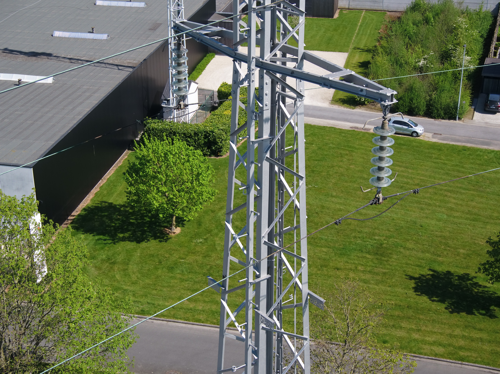

In [21]:
# Convert the tensor to an image

transform =  T.ToPILImage()
TowerImage = transform(TowerImageTensor)

new_width = 500
    
# Calculate the new height to preserve the aspect ratio
aspect_ratio = TowerImage.height / TowerImage.width
new_height = int(new_width * aspect_ratio)

# Resize the image
resized_img = TowerImage.resize((new_width, new_height))
resized_img

In [23]:
# Add the bounding box to the image 
draw = ImageDraw.Draw(TowerImage)
draw.rectangle(TowerBBox, outline="red", width=3)
#TowerImage

# EDA

In [12]:
df = TowerDataset.img_labels
df['teller'] =1
df = df[['pylone','nature', 'teller']]

In [13]:
# Create a pie chart
df.groupby(['nature']).sum(numeric_only=True)

,teller
nature,
Corps étranger,7
deformation,19
peinture,199
rouille,203


In [14]:
df.groupby(['pylone']).sum(numeric_only=True)

,teller
pylone,
P10,114
P12,237
P14,77
